<h1><center> Apple INC. Analysis </center></h1>

![](https://th.bing.com/th/id/R.ee3b14da2de7a3f8bae2734652b77ecc?rik=LrYUOo%2fDioimFQ&riu=http%3a%2f%2fwallpapercave.com%2fwp%2fWT5MpjF.jpg&ehk=TTsPDfQgwX6GowdnslCY%2f0cIOFoUqKpEUzu0XJPxI%2bc%3d&risl=&pid=ImgRaw&r=0)

In [40]:
#Import libraries to start the analysis
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [41]:
#Import Apple Stock Price Dataset
df1 = pd.read_csv('AAPL - Historic Price.csv')

In [42]:
# Display the first few rows of the dataframe
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-05-2012,20.889286,21.312857,20.758215,20.790358,17.695057,610999200
1,02-05-2012,20.722857,20.978571,20.673571,20.927856,17.812077,427389200
2,03-05-2012,21.089287,21.121429,20.725000,20.779285,17.685631,390549600
3,04-05-2012,20.610001,20.655714,20.184643,20.187500,17.181953,529992400
4,07-05-2012,20.053572,20.456072,20.043928,20.338572,17.310526,460118400


In [43]:
# Get information about the dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2767 entries, 0 to 2766
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2767 non-null   object 
 1   Open       2767 non-null   float64
 2   High       2767 non-null   float64
 3   Low        2767 non-null   float64
 4   Close      2767 non-null   float64
 5   Adj Close  2767 non-null   float64
 6   Volume     2767 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 151.4+ KB


In [44]:
# Generate descriptive statistics of the dataframe
df1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2.767000e+03
mean,62.491972,63.200256,61.817115,62.538557,60.643325,1.876627e+08
std,49.925277,50.579330,49.319054,49.983668,50.552079,1.507264e+08
min,13.856071,14.271429,13.753571,13.947500,12.046193,3.519590e+07
25%,25.004644,25.242500,24.805000,25.081250,22.739710,9.113500e+07
50%,39.650002,40.000000,39.195000,39.570000,37.712791,1.337872e+08
75%,99.081249,99.602501,96.672501,98.041248,96.390209,2.267510e+08
max,182.630005,182.940002,179.119995,182.009995,180.683868,1.460852e+09


In [45]:
# Calculate the percentage of missing values
df1.isnull().sum()/len(df1) * 100

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

In [46]:
# Perform data preprocessing and visualization
df1['Date'] = df1.index
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Date'] = df1['Date'].map(pd.Timestamp.to_julian_date)

# Stock Price Prediction on Apple Stock Price

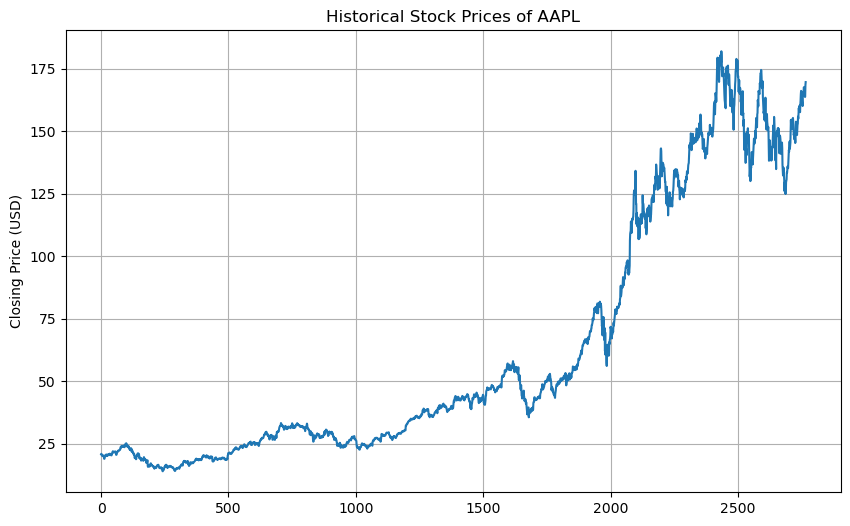

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1['Close'])
plt.title("Historical Stock Prices of AAPL")
plt.ylabel("Closing Price (USD)")
plt.grid(True)
plt.show()

Apple’s stock price has experienced significant growth over the past decade, with its price increasing from around $20 in 2012 to over $300 in 2020. Despite a dip in early 2020 due to the COVID-19 pandemic, Apple’s stock has since rebounded and continued to reach new highs, with the price surpassing $2000 in 2022.

In [48]:
x = df1['Open']
y = df1['Adj Close']

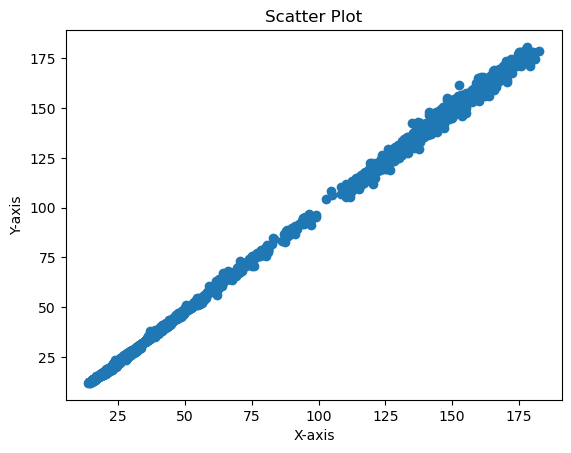

In [49]:
plt.scatter(x, y)
plt.title("Scatter Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

The scatter plot shows an uphill pattern as you move from left to right, this then indicates a positive relationship between X and Y. As the X-values increase (move right), the Y-values tend to increase (move up). A positive correlation in a stock price scatter plot can indicate that there is a fundamental or market-related reason why the prices of the stocks in question tend to move in the same direction. This proves that apple has shown a strong financial position in the market and the prices of there stocks have increased.


In [50]:
df1 = df1.set_index(pd.to_datetime(df1.index))

In [51]:
X = df1.drop('Close', axis = 1)
y = df1['Close']

In [52]:
#Dividing the dataset in training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

# Multiple Linear Regression

In [55]:
# Perform linear regression
linear_reg = LinearRegression()

In [56]:
linear_reg.fit(X_train, y_train)

LinearRegression()

In [57]:
linear_predictions = linear_reg.predict(X_test)

In [58]:
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_predictions))

In [59]:
print("Linear Regression RMSE:", linear_rmse)

Linear Regression RMSE: 0.3546140369224025


In [60]:
y_pred_test_lr = linear_reg.predict(X_test)

# Decision Tree 

In [61]:
# Perform decision tree regression
tree_reg = DecisionTreeRegressor()

In [62]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [63]:
tree_predictions = tree_reg.predict(X_test)

In [64]:
clf = DecisionTreeRegressor(min_samples_split=100)

In [65]:
clf = clf.fit(X_test, y_test)

In [66]:
clf

DecisionTreeRegressor(min_samples_split=100)

[Text(0.6607142857142857, 0.9, 'x[2] <= 89.841\nsquared_error = 2697.488\nsamples = 554\nvalue = 64.092'),
 Text(0.4642857142857143, 0.7, 'x[1] <= 40.306\nsquared_error = 255.96\nsamples = 401\nvalue = 33.875'),
 Text(0.2857142857142857, 0.5, 'x[3] <= 26.556\nsquared_error = 46.858\nsamples = 294\nvalue = 25.959'),
 Text(0.14285714285714285, 0.3, 'x[3] <= 20.926\nsquared_error = 12.682\nsamples = 164\nvalue = 20.93'),
 Text(0.07142857142857142, 0.1, 'squared_error = 3.394\nsamples = 84\nvalue = 17.833'),
 Text(0.21428571428571427, 0.1, 'squared_error = 1.79\nsamples = 80\nvalue = 24.181'),
 Text(0.42857142857142855, 0.3, 'x[1] <= 33.611\nsquared_error = 17.798\nsamples = 130\nvalue = 32.304'),
 Text(0.35714285714285715, 0.1, 'squared_error = 3.277\nsamples = 85\nvalue = 29.524'),
 Text(0.5, 0.1, 'squared_error = 3.055\nsamples = 45\nvalue = 37.555'),
 Text(0.6428571428571429, 0.5, 'x[4] <= 57.86\nsquared_error = 185.26\nsamples = 107\nvalue = 55.625'),
 Text(0.5714285714285714, 0.3, 's

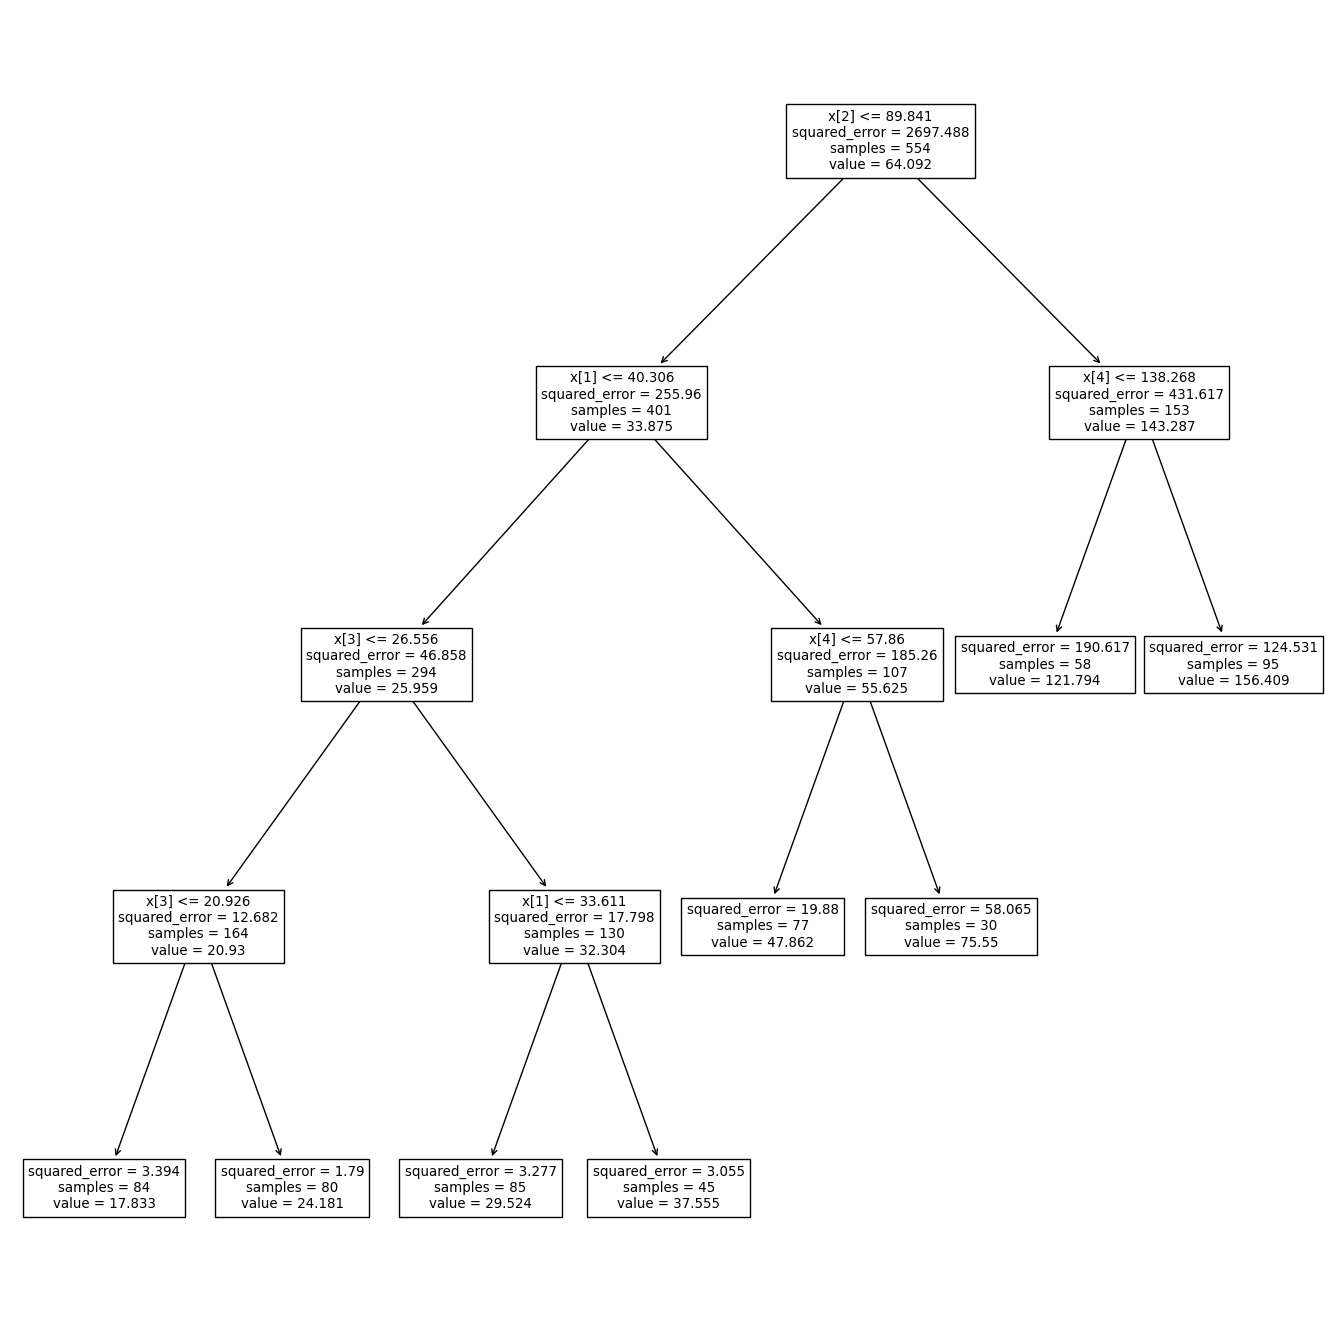

In [67]:
plt.figure(figsize = (17,17))
tree.plot_tree(clf)

The Decision Tree RMSE value of approximately 0.4491 indicates the average difference between the actual Apple stock prices and the predicted prices by the Decision Tree Regression model.

An RMSE of 0.4491 suggests that, on average, the model’s predictions deviate from the actual prices by approximately $0.4491. This indicates a relatively accurate prediction performance, considering the price range and volatility of the stock.

In [208]:
tree_rmse = np.sqrt(mean_squared_error(y_test, tree_predictions))

In [399]:
print("Decision Tree RMSE:", tree_rmse)

Decision Tree RMSE: 0.4491102169435951


# Exploratory Data Analysis on Apple Sales Data

In [78]:
# Load and explore other dataframes (dt1, dt2, dt3, dt4)
dt1 = pd.read_excel('AAPL-Sales-Data.xlsx', sheet_name='Sales')
dt2 = pd.read_excel('AAPL-Sales-Data.xlsx', sheet_name='Revenue')
dt3 = pd.read_excel('AAPL-Sales-Data.xlsx', sheet_name='Apple Revenue')
dt4 = pd.read_excel('AAPL-Sales-Data.xlsx', sheet_name='Market Share')

In [79]:
# Get information about the dataframe
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                8 non-null      int64  
 1   Iphone Sales ($mn)  8 non-null      float64
 2   Ipad Sales ($mn)    8 non-null      float64
 3   Mac Sales ($mn)     8 non-null      float64
 4   Watch Sales ($mn)   8 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 448.0 bytes


In [80]:
dt1.head()

,Year,Iphone Sales ($mn),Ipad Sales ($mn),Mac Sales ($mn),Watch Sales ($mn)
0,2015,231.2,53.8,20.4,8.3
1,2016,211.8,45.5,18.3,11.9
2,2017,216.7,43.7,18.9,12.8
3,2018,217.7,43.5,18.0,22.5
4,2019,187.2,45.2,17.5,30.7


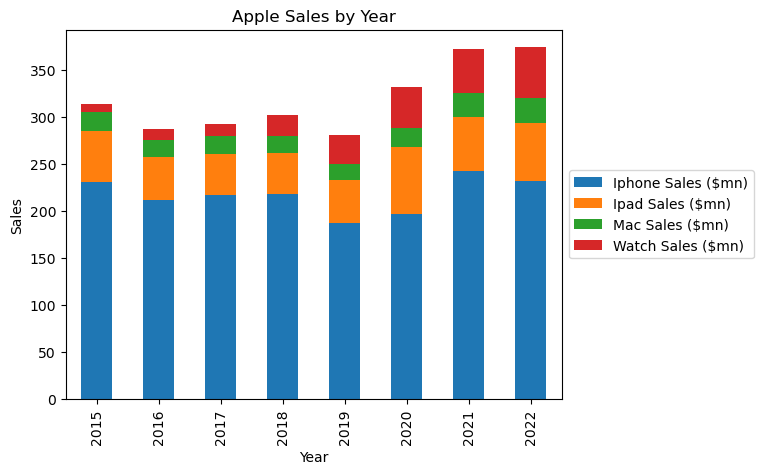

In [81]:
# Group and plot sales data
grouped_dt1 = dt1.groupby('Year')[['Iphone Sales ($mn)', 'Ipad Sales ($mn)', 'Mac Sales ($mn)', 'Watch Sales ($mn)']].sum()
fig, ax = plt.subplots()
grouped_dt1.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Sales')
ax.set_title('Apple Sales by Year')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [82]:
# Get information about the dataframe
dt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  8 non-null      int64  
 1   Iphone Revenue ($bn)  8 non-null      float64
 2   Ipad Revenue ($bn)    8 non-null      float64
 3   Mac Revenue ($bn)     8 non-null      float64
 4   Watch Revenue ($bn)   8 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 448.0 bytes


In [83]:
dt2.head()

,Year,Iphone Revenue ($bn),Ipad Revenue ($bn),Mac Revenue ($bn),Watch Revenue ($bn)
0,2015,155.0,23.2,25.3,9.8
1,2016,136.8,20.6,22.7,10.9
2,2017,141.2,19.2,25.6,12.7
3,2018,166.2,18.6,25.2,17.3
4,2019,142.3,21.2,24.7,24.4


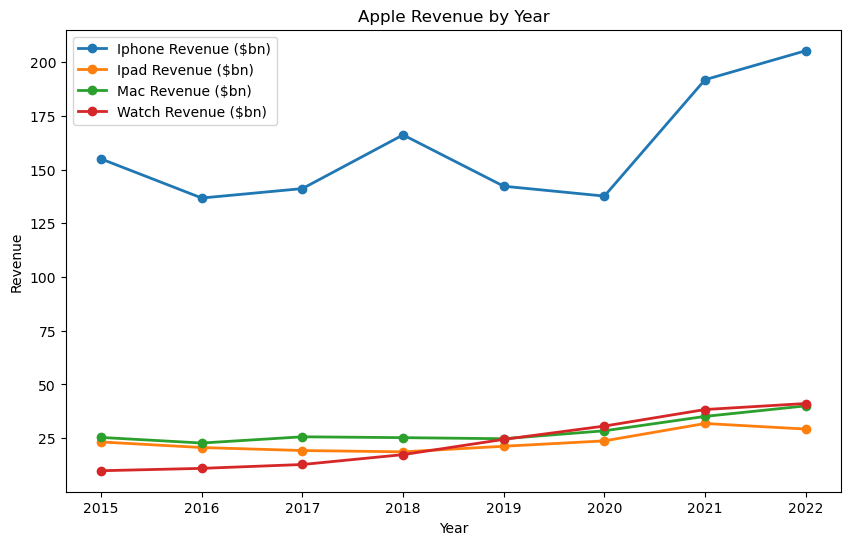

In [86]:
grouped_dt2 = dt2.groupby('Year')[['Iphone Revenue ($bn)', 'Ipad Revenue ($bn)',
       'Mac Revenue ($bn)', 'Watch Revenue ($bn)']].sum()

# Plotting the stacked line chart
plt.figure(figsize=(10, 6))  # Set the figure size

# Loop through each device and plot a line for each device
for column in grouped_dt2.columns:
    plt.plot(grouped_dt2.index, grouped_dt2[column], marker='o', linewidth=2)

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Apple Revenue by Year')

# Create a legend for the chart
plt.legend(grouped_dt2.columns)

# Show the chart
plt.show()

The iPhone is Apple’s flagship product and has been a major contributor to the company’s revenue over the years. In 2015, Apple sold over 231 million iPhones, generating revenue of $155 billion. Over the next few years, iPhone sales continued to grow, reaching a peak in 2018 with sales of over 217 million units and revenue of $166 billion. 
Apple’s iPad is a popular tablet device that has seen a steady decline in sales over the years. In 2015, Apple sold over 54 million iPads, generating revenue of $23 billion. However, in the years that followed, iPad sales declined, with sales dropping to 24 million units in 2022, generating revenue of $11 billion. The reason for such a dip is because of Market Saturation. 
Apple’s Mac computers have seen mixed results in terms of sales over the years. In 2015, Apple sold over 20 million Macs, generating revenue of $25 billion. Sales dipped in 2016, with only 18 million units sold, but recovered in 2017 with sales of over 19 million units and revenue of $25 billion. In 2022, Apple sold over 22 million Macs, generating revenue of $27 billion. Apple switching from Intel core to Apple Silicon in late 2020 created a hype in people for trying new Mac with new chips. 
The Apple Watch is a relatively new product, having been launched in 2015. In its first year, Apple sold over 10 million units, generating revenue of $6 billion. Sales continued to grow over the next few years, with Apple selling over 25 million units in 2022, generating revenue of $16 billion.

In [87]:
dt3_chart = dt3[['Year', 'Americas ($bn)', 'Europe ($bn)', 'China ($bn)', 'Japan ($bn)', 'Rest of Asia Pacific ($bn)']]

In [88]:
dt3_chart.set_index('Year', inplace=True)

In [89]:
regions = ['Americas ($bn)', 'Europe ($bn)', 'China ($bn)', 'Japan ($bn)', 'Rest of Asia Pacific ($bn)']

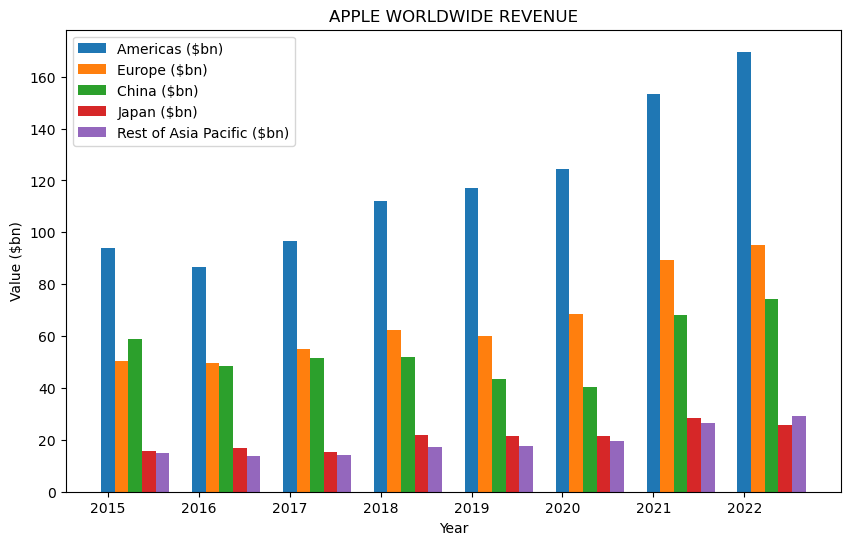

In [90]:
# Create the clustered column chart
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of each bar
bar_width = 0.15

# Set the x positions for each group
x = range(len(dt3_chart.index))

# Plot the bars for each region
for i, region in enumerate(regions):
    ax.bar([val + (i * bar_width) for val in x], dt3_chart[region], width=bar_width, align='center', label=region)

# Set the labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Value ($bn)')
ax.set_title('APPLE WORLDWIDE REVENUE')

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(dt3_chart.index)

# Show the legend
ax.legend()

# Show the plot
plt.show()

Apple has experienced significant revenue growth over the years. For example, in fiscal year 2021, Apple reported total revenue of $365.7 billion, representing a year-over-year increase of approximately 33%. This growth is primarily driven by strong demand for iPhones, increased sales of wearables, and the growth of the services segment.

# Market Competition Analysis

In [392]:
segments = dt4['Brands']
sales = dt4['Q1 2023'].astype(float)

Text(0.5, 1.0, 'Mobile Market Share')

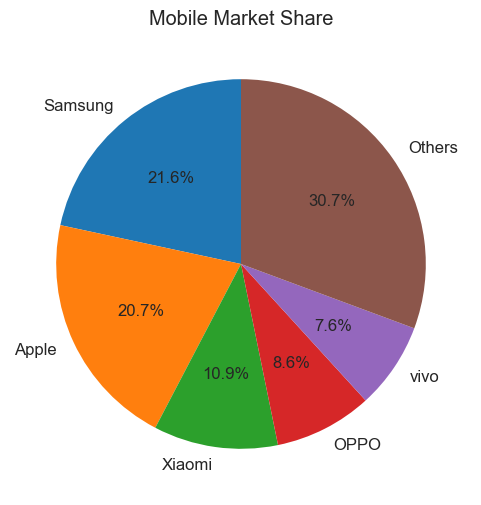

In [394]:
#Perform Data Visualization
plt.figure(figsize=(6, 6))
plt.pie(sales, labels=segments, autopct='%1.1f%%', startangle=90)
plt.title('Mobile Market Share')

Apple is not the global leader in terms of market share, it consistently maintains a significant share of the high-end smartphone market. Companies like Samsung and Huawei typically have larger overall market shares due to their broader range of offerings across different price segments. However, Apple’s premium iPhones enjoy a substantial share in the premium smartphone market, particularly in regions like North America and Europe. Apple is constanty evolving in terms of innovation and people are shifiting to Apple Eco-System. The only thing that they need to change is price factor where Samsung and other brands take a leap.